In [ ]:
! pip install weightwatcher transformers 

## Makes plots for theory paper: Hysteresis Effect

### This is the simplest possible modern MLP, 3 layers trained on MNIST

**IMPORTANT**:
- First train the models. See WW_MLP3_Training_pytorch.ipynb or WW_MLP3_Training_keras.ipynb

In [ ]:
# If you are running this NB in google colab then execute this cell

from google.colab import drive
drive.mount('/drive')
results_dir = '/drive/MyDrive/setol_paper'

!ls $results_dir

In [1]:
import os
os.chdir("../pytorch")

# If you are running this NB locally then set your results directory and execute this cell

results_dir = "../pytorch/saved_models/SETOL"
!ls $results_dir

MNIST  TEST


### Testing SETOL theory outside of its Ideal conditions
The HTSR and SETOL theories are based on the idea that neural networks undergoing training behave like Statistical Mechanic systems relaxing to an equilibrium. So far, we have tested the theory under conditions that are approaching Ideal. However, for the theory to be useful in practice, we must also examine how it performs farther away from the Ideal. Of particular interest, we would like to examine the theory under conditions where the model cannot easily relax, i.e., when it is in a ''glassy'' state. One way we can do this is to freeze the FC1 layer, which has been shown to dominate learning, as test error behaves more concordantly with its $\alpha$. With FC1 frozen to its initial random state, the much smaller FC2 will have to do all of the learning. 

To understand how $\alpha_{FC2}$ behaves outside of Ideal conditions, we first show how it behaved in the original experiment. The code below plots $\alpha_{FC2}$ over the epochs of training, for each learning rate. Change `search_param` to `"BS"` to see results for batch size search.

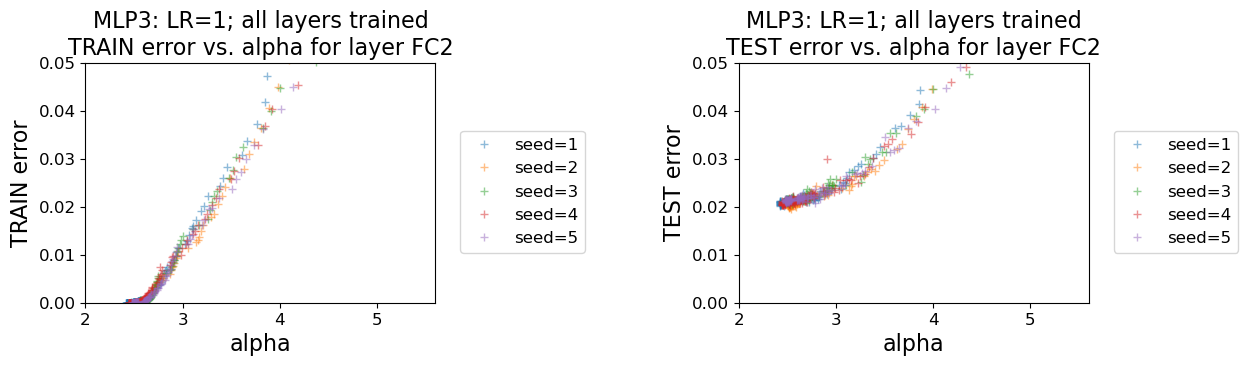

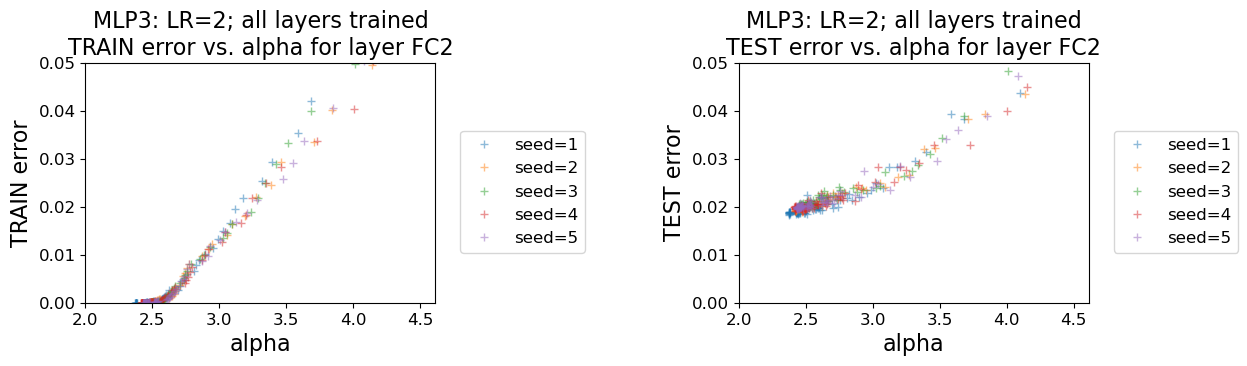

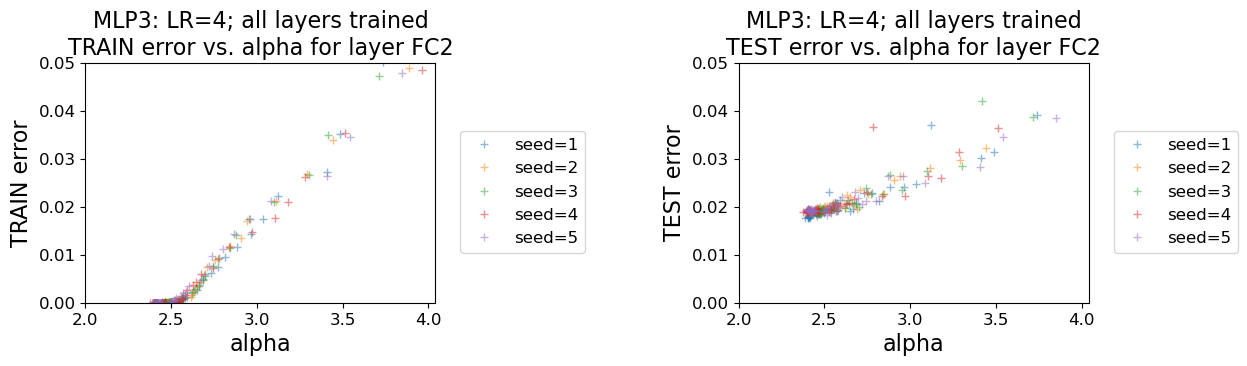

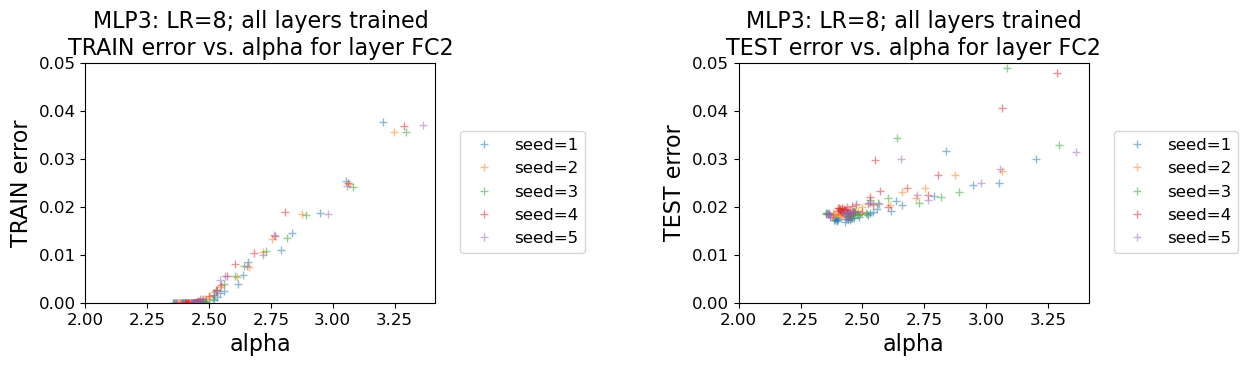

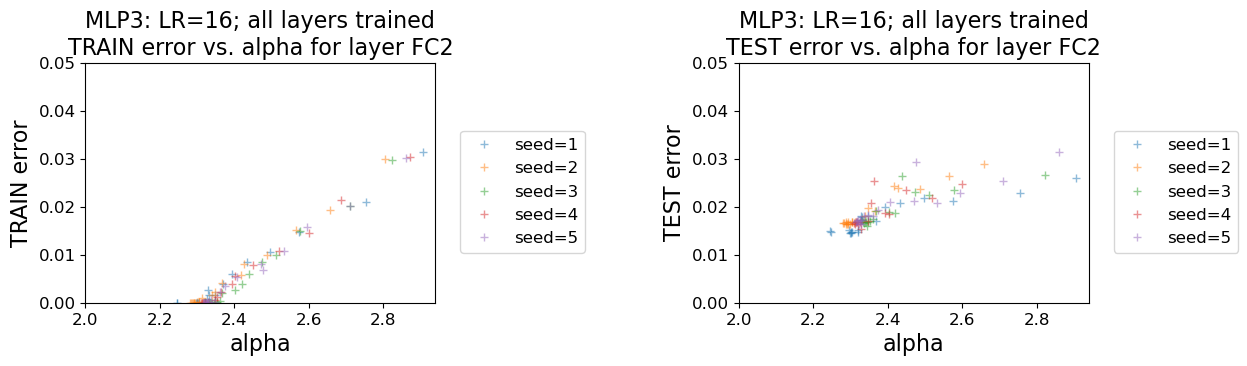

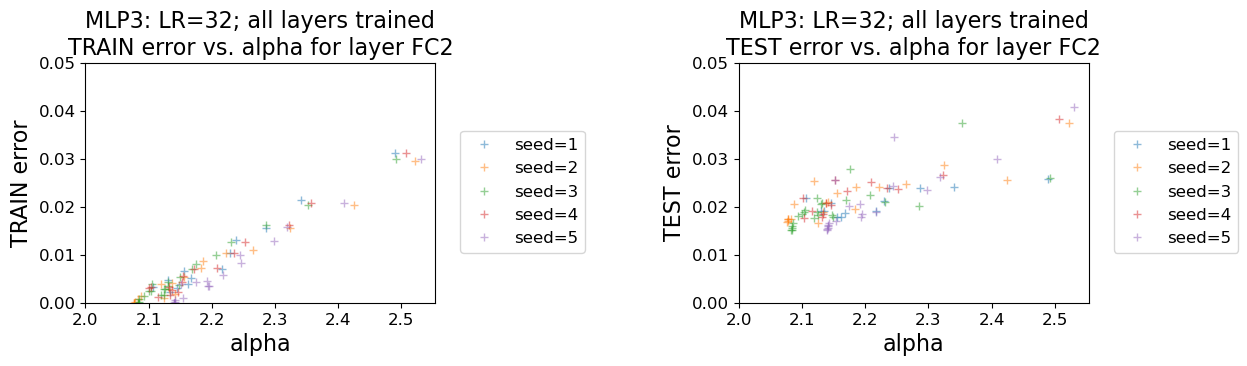

In [2]:
from plot_utils import plot_loss

WW_metric = "alpha"
search_param = "LR"

LOSS = False
FC1 = 0
FC2 = 1

for scale in range(6):
  plot_loss("MNIST", "all", search_param, scale, range(5), FC2, WW_metric=WW_metric, LOSS=LOSS, ylim=(None, 0.05), save_dir=f"figs/alpha_by_epochs")

### We generally see error decreasing as $\alpha$ decreases.
(Recall that alpha decreases over epochs, meaning that as epochs progress, the curve moves down and to the left.)
We also see again that larger learning rates train for fewer epochs.

We also see that as 

Next we plot $\alpha$ for FC2, where only FC2 was trained, meaning that both FC1 and the classification layer were frozen.

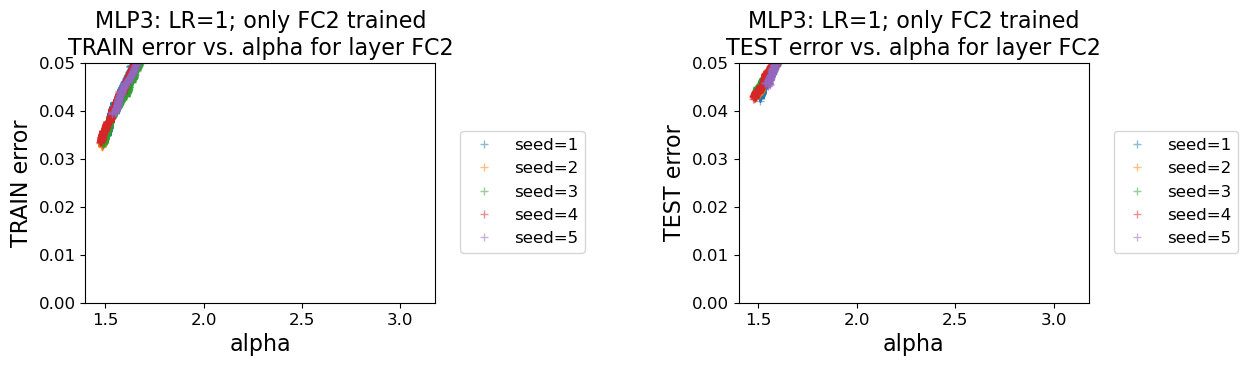

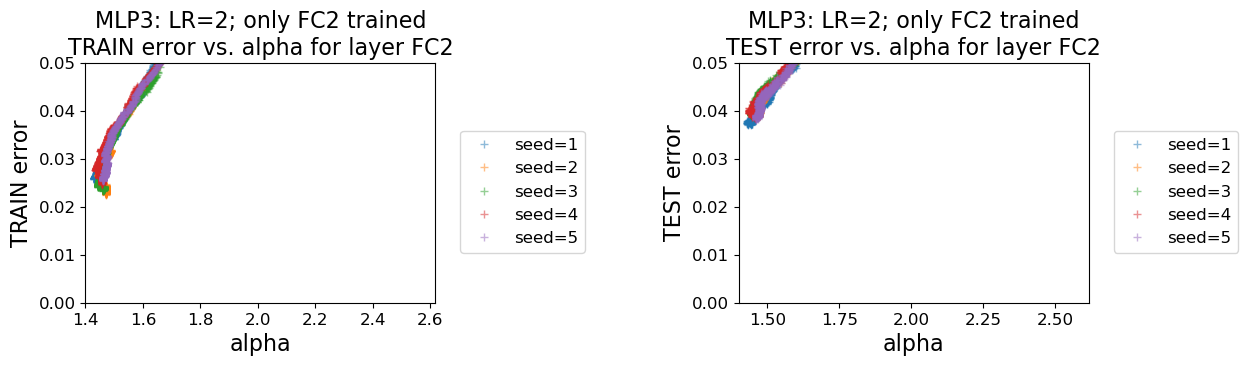

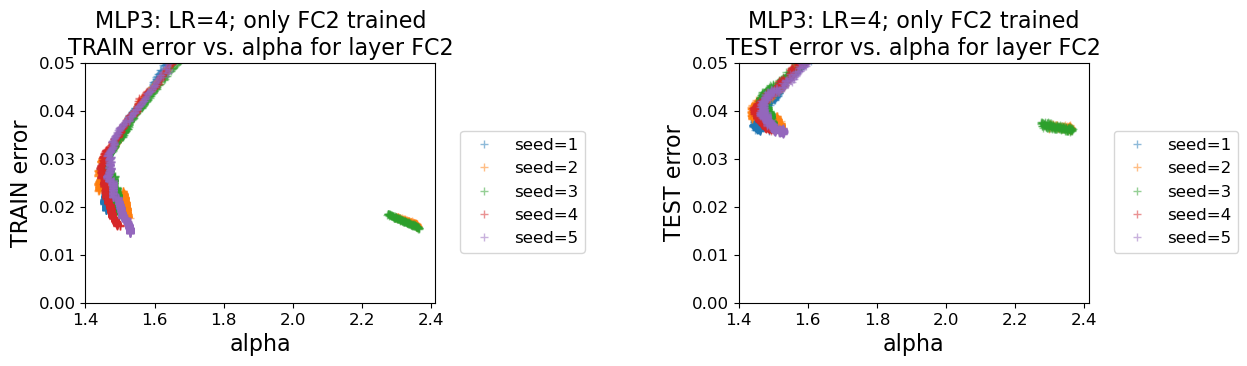

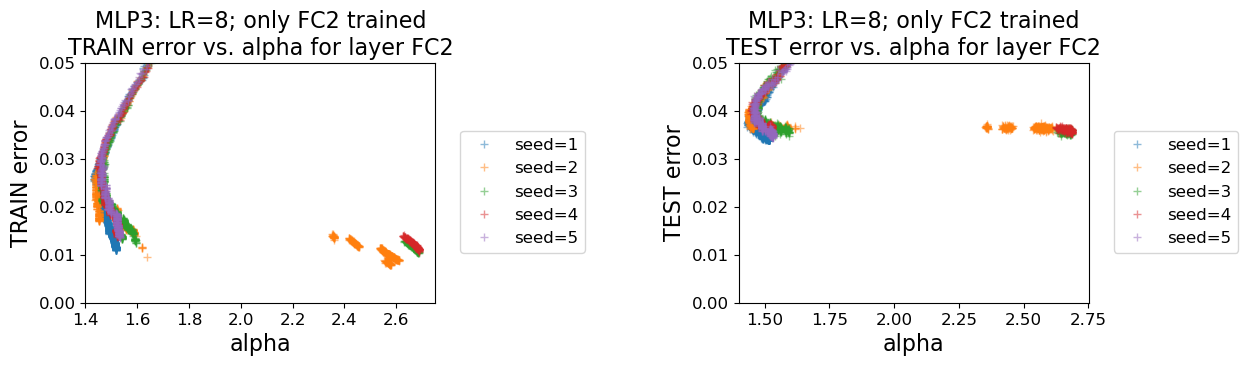

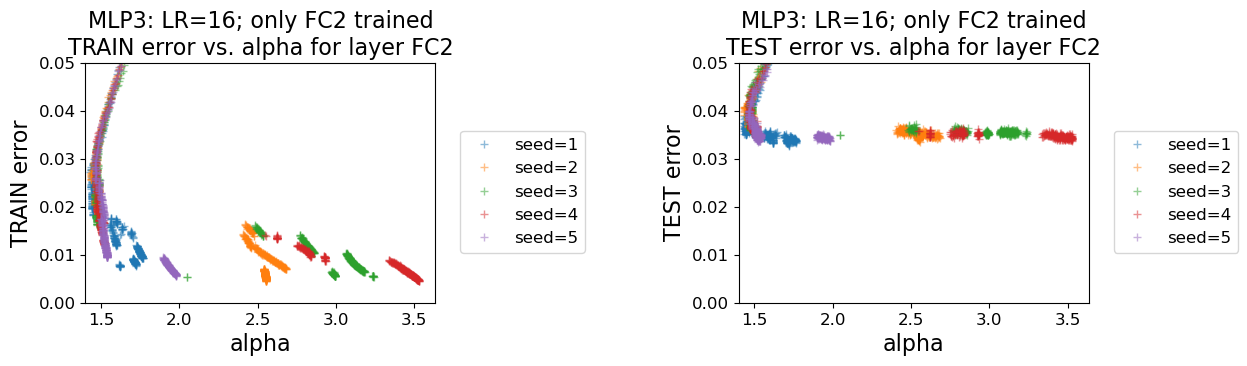

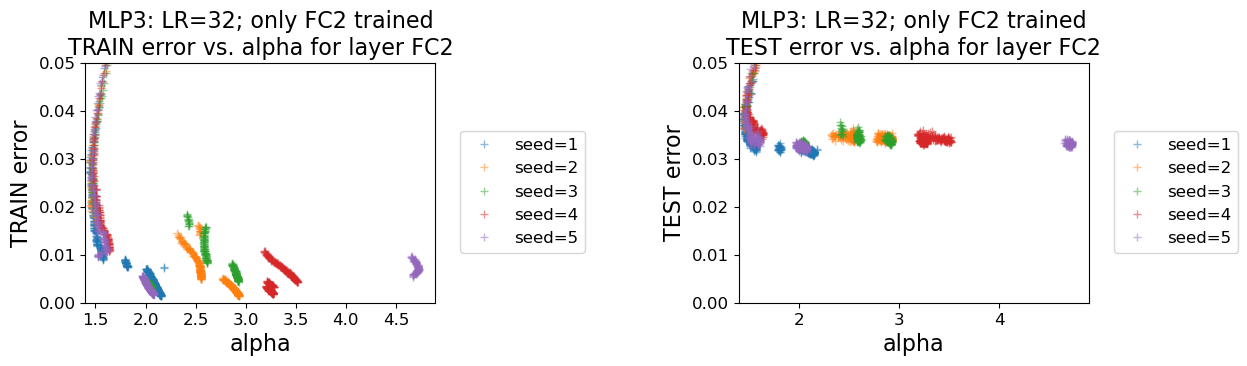

In [9]:
from plot_utils import plot_loss

WW_metric = "alpha"
search_param = "LR"

LOSS = False
FC1 = 0
FC2 = 1

for scale in range(6):
  plot_loss("MNIST", "FC2", search_param, scale, range(5), FC2, WW_metric=WW_metric, LOSS=LOSS, xlim=(1.4, None), ylim=(None, 0.05), save_dir=f"figs/alpha_by_epochs")

### As expected, test error is higher.
For low learning rates, $\alpha$ is driven downward, but as learning rate increases eventually $\alpha$ starts increasing again. At learning rates $16\times$ and $32\times$, we also see a kind of fracturing across different random seeds. This bending of $\alpha$ to the right as error decreases is a form of hysteresis.

### What is the Hysteresis effect?
Hysteresis is a tendency of the evolution of the state of a system to evolve in a way that has a memory of its past states, i.e., it is non-Markovian. In this case, we see that $\alpha_{FC2}$ decreased below $2$, and then increased again once it hit a minimum.
